# Amazon Customer Segmentation Analysis

### Aim of the Analysis
The task is to analyze and visualize the Amazon customers dataset, and to create a customer segmentation analysis from the data.


### About the Dataset

Source: [Kaggle](https://www.kaggle.com/datasets/surajjha101/myntra-reviews-on-women-dresses-comprehensive) \
A csv file containing information about 23K datapoints of customers and their reviews.

The attributes: 
1. s.no : the index 
2. age : Age of the customer 
3. division_name : Division of the Cloth customer has bought 
4. department_name : Department of the Cloth 
5. class_name : Class of the Cloth in particular. 
6. clothing_id : Clothing ID (Unique to a type of product) 
7. title : Title customers write on their feedback/review text 
8. review_text : Customer's Review Text 
9. alikefeedbackcount : Number of other customers who agrees with the given feedback (as their experience is quite the same) 
10. rating : Rating or stars they've given to the product 
11. recommend_index : Whether they'll recommend someone to buy the product or not (0: NO, 1:YES) 


## 1. Load and Transform the Data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [20]:
df = pd.read_csv('Women Dresses Reviews Dataset .csv')
df.head(10)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
5,5,43,General,Tops,Sweaters,933,Love the pattern and color,I love this sweater but i'm on the fence about...,0,4,1
6,6,83,General,Tops,Sweaters,937,Beautiful and unique.,Love this sweater!\r\nsoft and cozy and the ru...,4,5,1
7,7,34,General,Tops,Knits,868,Unique and wonderful,The sweater is comfortable and a good weight. ...,2,5,1
8,8,49,General Petite,Tops,Fine gauge,900,Great look all in one,I love everything about this sweater. it is ve...,4,5,1
9,9,49,General,Tops,Knits,873,Beauty meets comfort,"I love this top, the details at the neck and s...",0,5,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [22]:
df.shape

(23486, 11)

In [23]:
#check the number of missing values
nan_count = df.isna().sum()
nan_count

s.no                       0
age                        0
division_name             14
department_name           14
class_name                14
clothing_id                0
title                   3810
review_text              845
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64

In [24]:
#check the number of duplicates
dups_count = df.duplicated().sum()
dups_count

0

In [25]:
columns = df.columns.tolist()
columns

['s.no',
 'age',
 'division_name',
 'department_name',
 'class_name',
 'clothing_id',
 'title',
 'review_text',
 'alike_feedback_count',
 'rating',
 'recommend_index ']

## 2. Analyze the Data

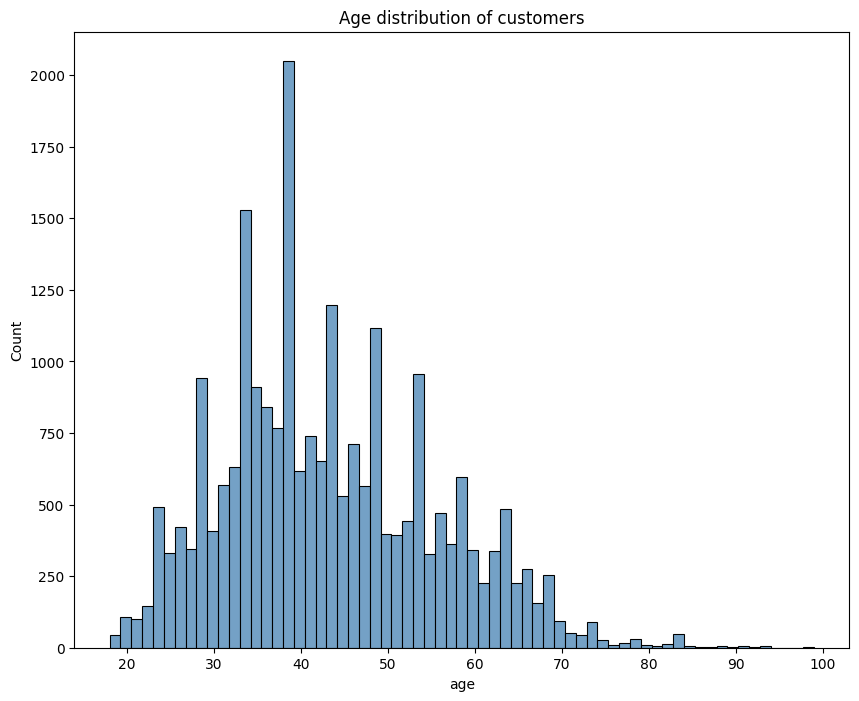

In [26]:
#create visualizations to better understand the data

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(df, x='age', color='steelblue')
plt.title("Age distribution of customers")
plt.show()

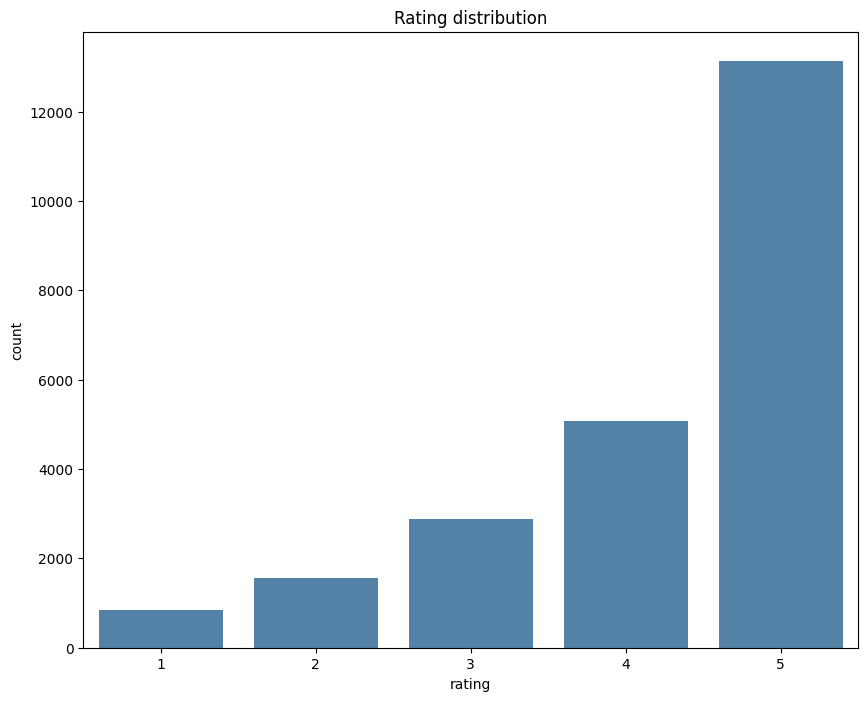

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(df, x='rating', color='steelblue')
plt.title("Rating distribution")
plt.show()

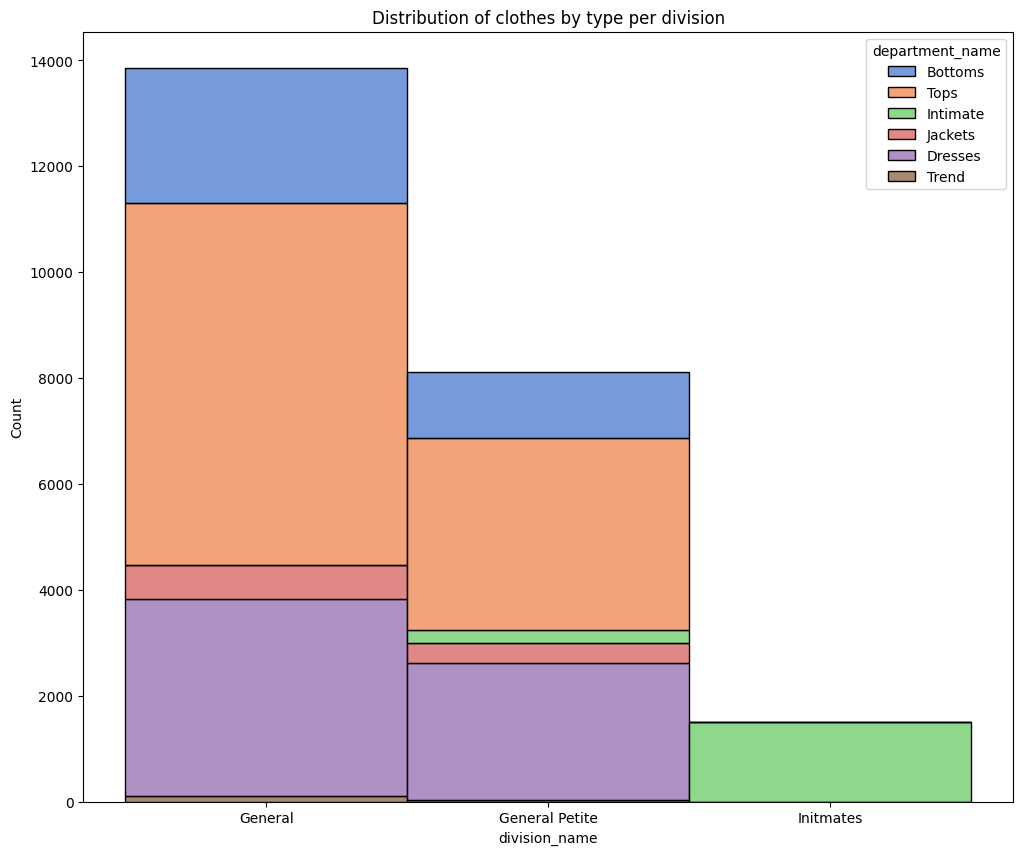

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.histplot(df, x='division_name', hue='department_name', multiple="stack", palette='muted')
plt.title('Distribution of clothes by type per division')
plt.show()

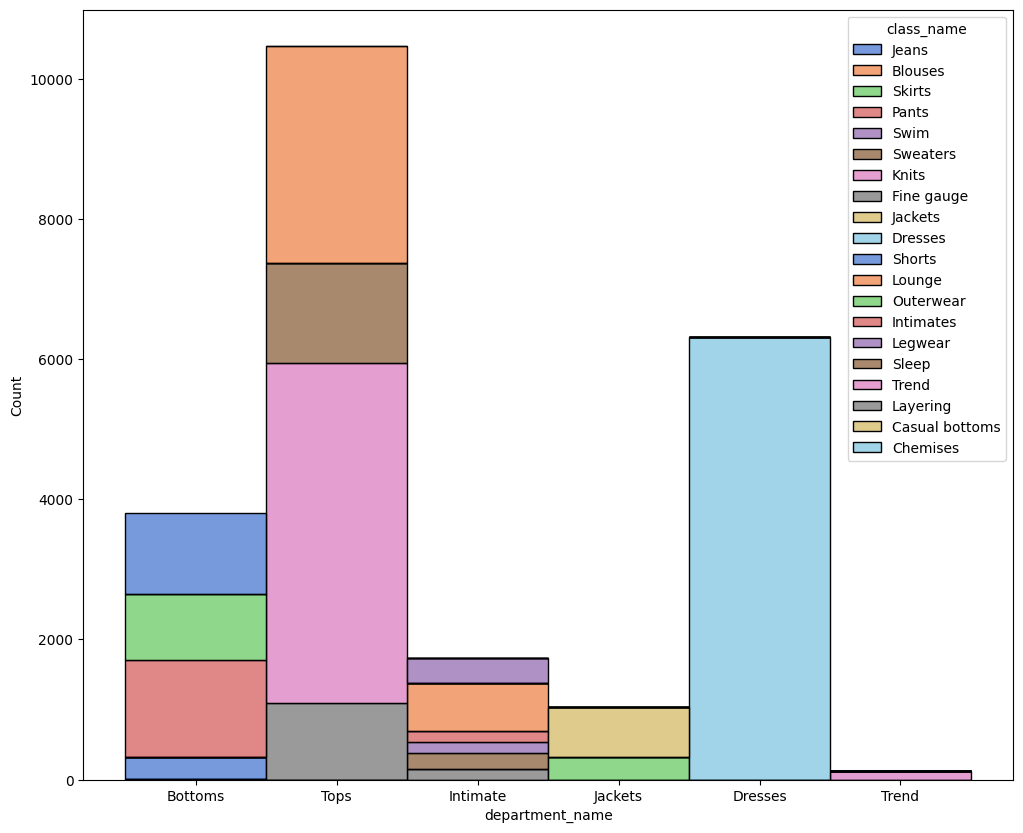

In [29]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.histplot(df, x='department_name', hue='class_name',  multiple="stack", palette='muted')
plt.show()

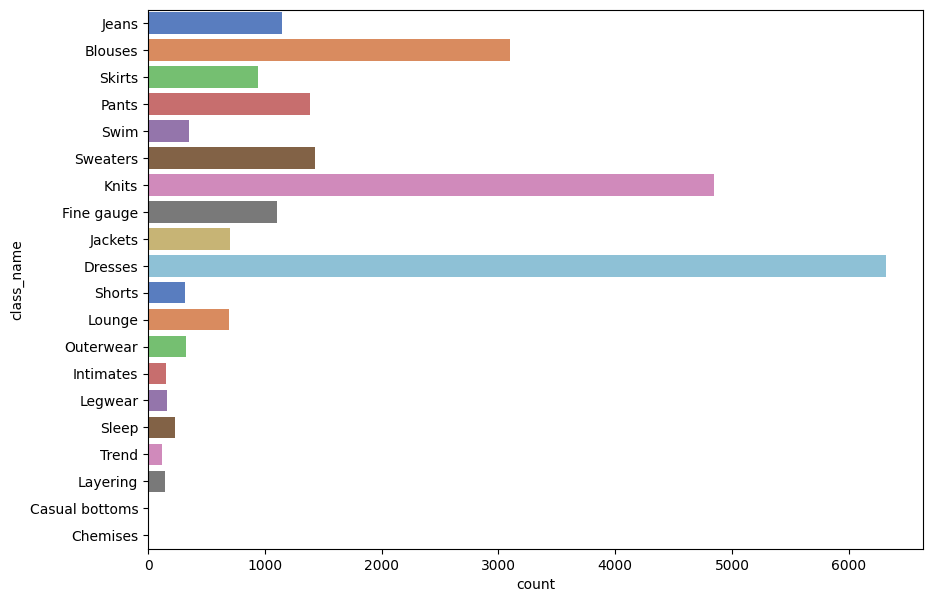

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df, y='class_name', palette='muted')
plt.show()

## 3. Clustering: Select Feature Columns

In [31]:
df_feat = df[['age','division_name','rating']]
df_feat.head()

,age,division_name,rating
0,40,General,5
1,62,General Petite,5
2,47,General Petite,1
3,45,General Petite,5
4,37,Initmates,5


In [32]:
feat_columns = df_feat.columns.tolist()
feat_columns

['age', 'division_name', 'rating']

In [33]:
#check the number of missing values
nan_count = df_feat.isna().sum()
nan_count

age               0
division_name    14
rating            0
dtype: int64

In [34]:
#remove missing values
df_feat = df_feat.dropna()
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23472 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            23472 non-null  int64 
 1   division_name  23472 non-null  object
 2   rating         23472 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 733.5+ KB


In [35]:
#check unique values
for col in df_feat:
    print(df_feat[col].unique())

[40 62 47 45 37 43 83 34 49 32 41 53 23 71 31 64 50 35 38 36 72 42 44 56
 60 75 59 30 46 79 66 21 52 39 33 29 54 26 63 51 65 55 28 25 57 24 27 61
 48 19 58 69 68 87 70 74 67 20 22 82 92 77 80 90 84 76 73 89 78 91 94 93
 85 86 99 81 18]
['General' 'General Petite' 'Initmates']
[5 1 4 2 3]


In [36]:
#change the division_name values to numbers
df_feat['division_name'].replace(['General', 'General Petite', 'Initmates'], [0,1,2], inplace=True)

for col in df_feat:
    print(df_feat[col].unique())

[40 62 47 45 37 43 83 34 49 32 41 53 23 71 31 64 50 35 38 36 72 42 44 56
 60 75 59 30 46 79 66 21 52 39 33 29 54 26 63 51 65 55 28 25 57 24 27 61
 48 19 58 69 68 87 70 74 67 20 22 82 92 77 80 90 84 76 73 89 78 91 94 93
 85 86 99 81 18]
[0 1 2]
[5 1 4 2 3]


In [37]:
#create the features matrix
X = df_feat.values
X = X.astype(float)
X[0:10]

array([[40.,  0.,  5.],
       [62.,  1.,  5.],
       [47.,  1.,  1.],
       [45.,  1.,  5.],
       [37.,  2.,  5.],
       [43.,  0.,  4.],
       [83.,  0.,  5.],
       [34.,  0.,  5.],
       [49.,  1.,  5.],
       [49.,  0.,  5.]])

In [38]:
#scale the data
X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.26063009, -0.77155355,  0.72462051],
       [ 1.53080585,  0.85644941,  0.72462051],
       [ 0.30937226,  0.85644941, -2.87844962],
       ...,
       [-1.15634806,  0.85644941,  0.72462051],
       [ 1.12366132, -0.77155355,  0.72462051],
       [ 1.04223241, -0.77155355,  0.72462051]])

## 3. Customer Segmentation Analysis

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

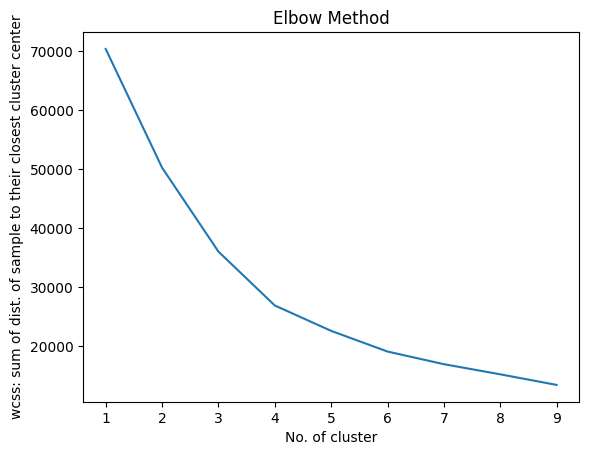

In [39]:
#find the optimal number of clusters by using Elbow Method

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#draw the plot    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

The optimum number of clusters i.e., n_clusters is 4.

In [40]:
#apply optimum k-means clustering for the data to find the cluster number of each data
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X_scaled)
print(y)

[2 1 0 ... 3 1 1]


In [41]:
#add an extra column at the end named ‘cluster’ to indicate which cluster the data belongs to
df_feat['cluster'] = y  


In [42]:
df_feat.head()

,age,division_name,rating,cluster
0,40,0,5,2
1,62,1,5,1
2,47,1,1,0
3,45,1,5,3
4,37,2,5,3


In [46]:
df_plot = df_feat.sample(frac=0.03,random_state=42)

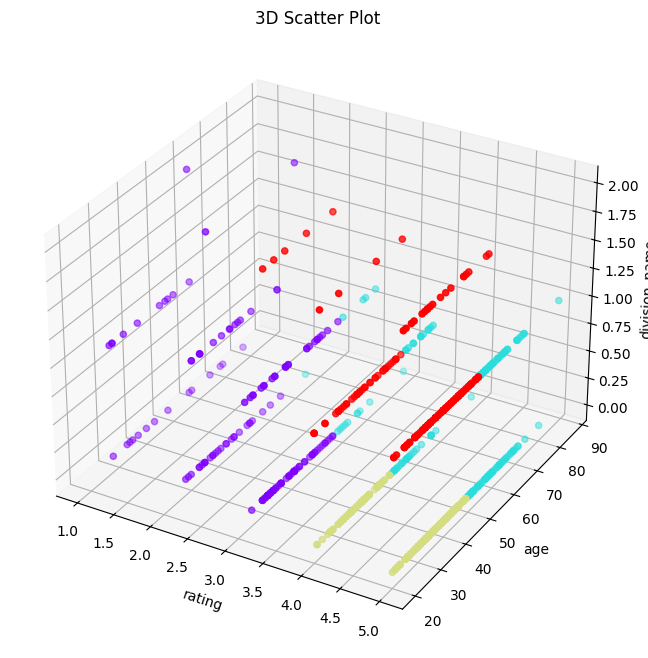

In [48]:
# Generate sample 3D data using make_blobs
X= df_plot[['age', 'division_name', 'rating']]

# Create a 3D scatter plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X['rating'], X['age'], X['division_name'],  c= df_plot['cluster'], marker='o',cmap= "rainbow")

# Set labels and title
ax.set_xlabel('rating')
ax.set_ylabel('age')
ax.set_zlabel('division_name')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

The categories were assigned as 'General' = 0, 'General Petite' = 1, 'Initmates' = 2

In [45]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled,y)
print(score)


0.3760925809357785


## Conclusion: 
From the data, we can divide the customers into four clusters:
1. 20-60 year olds who buy general and general petite clothes, only sometimes initmates, but who are not satisfied with their products (rating <= 3)
2. 20-55 year olds who buy only general clothes and are greatly satisfied with their products (rating > 3)
3. 20-55 year olds who buy general petite clothes and sometimes initmates, too, and are satisfied with their products (rating >= 3)
4. 55-90 year olds who buy mostly general clothes, sometimes also general petite, and who are usually satisfied with their products (rating >= 2)

However, the uneven amount of data from each category of clothes affects the reliability and precision of the clusterization.